<h1> Восстановление золота из руды <span class="tocSkip"></span></h1>

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

![jupyter](https://pictures.s3.yandex.net/resources/smape_1576239058.jpg)

![jupyter](https://pictures.s3.yandex.net/resources/_smape_1576239054.jpg)

# Подготовка данных

Импорт необходимых библиотек.

In [4]:
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor

Загрузка имеющихся данных.

## Обучающая выборка

In [8]:
try:  
    data_train = pd.read_csv('C:/projects/2/gold_recovery_train_new.csv')
except OSError as e:
    data_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
display(data_train.head(10))
display(data_train.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

## Тестовая выборка

In [9]:
try:  
    data_test = pd.read_csv('C:/projects/2/gold_recovery_test_new.csv')
except OSError as e:
    data_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
display(data_test.head(10))
display(data_test.info())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

## Исходные данные

In [10]:
try:  
    data_full = pd.read_csv('C:/projects/2/gold_recovery_full_new.csv')
except OSError as e:
    data_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')
display(data_full.head(10))
display(data_full.info())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

Проверка данных на наличие пропусков и их кол-во.

In [11]:
def uniq_data(data):
    for column in data.columns:
        print('Название столбца', column)
        print(data[column].sort_values().unique())
    print('Количество пропусков в каждом столбце')
    print(data.isna().sum())

In [12]:
uniq_data(data_train)

Название столбца date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Название столбца final.output.concentrate_ag
[0.00000000e+00 9.99999978e-03 2.89058560e-01 ... 1.36916988e+01
 1.60019451e+01            nan]
Название столбца final.output.concentrate_pb
[0.00000000e+00 9.99999978e-03 3.32391277e-01 ... 1.67052966e+01
 1.70318995e+01            nan]
Название столбца final.output.concentrate_sol
[0.00000000e+00 9.99999978e-03 2.53230694e-01 ... 1.80463950e+01
 1.81248509e+01            nan]
Название столбца final.output.concentrate_au
[0.00000000e+00 9.99999978e-03 1.06399152e+00 ... 5.15718847e+01
 5.26817252e+01 5.27566376e+01]
Название столбца final.output.recovery
[  0.           0.16861094   0.43026371 ...  99.74147843  99.9101831
 100.        ]
Название столбца final.output.tail_ag
[0.00000000e+00 1.67896355e-02 8.06744246e-02 ... 1.91534636e+01
 1.91572238e+01 1.95521486e+01]
Название сто

In [13]:
uniq_data(data_test)

Название столбца date
['2016-09-01 00:59:59' '2016-09-01 01:59:59' '2016-09-01 02:59:59' ...
 '2017-12-31 21:59:59' '2017-12-31 22:59:59' '2017-12-31 23:59:59']
Название столбца primary_cleaner.input.sulfate
[  2.56615646   2.92672026   7.02559127 ... 262.53150186 265.98312306
          nan]
Название столбца primary_cleaner.input.depressant
[3.83948202e-03 5.73826182e-02 6.18642857e-02 ... 2.00467642e+01
 4.00000000e+01            nan]
Название столбца primary_cleaner.input.feed_size
[ 5.6500001   5.65000116  5.75       ...  9.77000046 11.47000792
 15.5       ]
Название столбца primary_cleaner.input.xanthate
[0.00498367 0.01048647 0.01804044 ... 4.06838427 4.10245436        nan]
Название столбца primary_cleaner.state.floatbank8_a_air
[5.44586042e-32 7.80587376e-32 4.12629243e+02 ... 1.92748500e+03
 2.09861546e+03 2.10310358e+03]
Название столбца primary_cleaner.state.floatbank8_a_level
[-795.31633745 -783.44855072 -782.5052678  ... -282.98844344 -189.69687804
  -57.19540358]
Название с

In [14]:
uniq_data(data_full)

Название столбца date
['2016-01-15 00:00:00' '2016-01-15 01:00:00' '2016-01-15 02:00:00' ...
 '2018-08-18 08:59:59' '2018-08-18 09:59:59' '2018-08-18 10:59:59']
Название столбца final.output.concentrate_ag
[0.00000000e+00 9.99999978e-03 1.93950451e-01 ... 1.36916988e+01
 1.60019451e+01            nan]
Название столбца final.output.concentrate_pb
[0.00000000e+00 9.99999978e-03 3.32391277e-01 ... 1.67052966e+01
 1.70318995e+01            nan]
Название столбца final.output.concentrate_sol
[0.00000000e+00 9.99999978e-03 2.53230694e-01 ... 1.94239117e+01
 1.96157205e+01            nan]
Название столбца final.output.concentrate_au
[0.00000000e+00 9.99999978e-03 9.04253877e-01 ... 5.15718847e+01
 5.26817252e+01 5.27566376e+01]
Название столбца final.output.recovery
[  0.           0.16861094   0.43026371 ...  99.78398229  99.9101831
 100.        ]
Название столбца final.output.tail_ag
[0.00000000e+00 1.67896355e-02 7.84052873e-02 ... 1.91572238e+01
 1.95521486e+01            nan]
Название сто

Удаление NaN в двух выборках.

In [9]:
#data_test= data_test.dropna()
#data_test

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5285,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5286,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5287,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5288,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [15]:
data_train = data_train.fillna(method='ffill')
print(data_train.isna().sum())

date                                          0
final.output.concentrate_ag                   0
final.output.concentrate_pb                   0
final.output.concentrate_sol                  0
final.output.concentrate_au                   0
                                             ..
secondary_cleaner.state.floatbank5_a_level    0
secondary_cleaner.state.floatbank5_b_air      0
secondary_cleaner.state.floatbank5_b_level    0
secondary_cleaner.state.floatbank6_a_air      0
secondary_cleaner.state.floatbank6_a_level    0
Length: 87, dtype: int64


In [10]:
#data_train = data_train.dropna()
#data_train

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14144,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
14145,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
14147,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


## Вывод

Имеющиеся данные были загружены в три переменные - обучающая, тестовая и полная выборка.

В данных имелись NaN, строки с ними были удалены, чтобы они не повлияли на итогвые вычисления.

# Анализ данных

## Расчет эффективности обогащения

Проверим правильность рассчета эффективности обогащения. Для признака rougher.output.recovery вычислим на обучающей выборке. 
Между значением признака и нашими расчетами найдем MAE.

![jupyter](https://pictures.s3.yandex.net/resources/Recovery_1576238822.jpg)

In [11]:
def recovery(c, f, t):
    recovery = (c *(f - t)) / (f * (c - t))*100
    return recovery

c = data_train['rougher.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['rougher.output.tail_au']
recovery_train = data_train['rougher.output.recovery']

print('Абсолютная средняя ошибка =', mean_absolute_error(recovery_train, recovery(c, f, t)))

Абсолютная средняя ошибка = 9.82970122149377e-15


Эффективность обогащения рассчитана правильно т.к. MAE очень маленькая.

## Анализ признаков недоступных в тестовой выборке

Создание функции для выявления недоступных признаков в тестовой выборке.

In [12]:
def unavailable_sign(data_1, data_2):
    data_1_columns = data_1.columns
    data_2_columns = data_2.columns
    for i in data_1_columns:
        if i not in data_2_columns:
            print(i)
            
unavailable_sign(data_full, data_test)

final.output.concentrate_ag
final.output.concentrate_pb
final.output.concentrate_sol
final.output.concentrate_au
final.output.recovery
final.output.tail_ag
final.output.tail_pb
final.output.tail_sol
final.output.tail_au
primary_cleaner.output.concentrate_ag
primary_cleaner.output.concentrate_pb
primary_cleaner.output.concentrate_sol
primary_cleaner.output.concentrate_au
primary_cleaner.output.tail_ag
primary_cleaner.output.tail_pb
primary_cleaner.output.tail_sol
primary_cleaner.output.tail_au
rougher.calculation.sulfate_to_au_concentrate
rougher.calculation.floatbank10_sulfate_to_au_feed
rougher.calculation.floatbank11_sulfate_to_au_feed
rougher.calculation.au_pb_ratio
rougher.output.concentrate_ag
rougher.output.concentrate_pb
rougher.output.concentrate_sol
rougher.output.concentrate_au
rougher.output.recovery
rougher.output.tail_ag
rougher.output.tail_pb
rougher.output.tail_sol
rougher.output.tail_au
secondary_cleaner.output.tail_ag
secondary_cleaner.output.tail_pb
secondary_cleaner.

Как показала функция в тестовой выборке недоступны признаки с типов `final.output`, `primary_cleaner.output`, `rougher.calculation`, `rougher.output`, `secondary_cleaner.output` - эти данные были получены по результатам технологического процесса. Это онлайн-метрика.
Остальные столбцы были исторически известны - значит это офлайн метрики.

## Подготовка данных для модели

Выделим столбцы из тестовой выборки для обучения модели, столбец data учитывать не будем.

Для предсказания rougher.output.recovery будут использоватся данные из стобцов этапа rougher.

Для вычисления final.output.recovery будут использованы все столбцы из тестовой выборки.


In [13]:
features_columns = data_test.columns[1:]
rougher_features_columns = set(features_columns[12:34])
final_features_columns = set(features_columns)
print(rougher_features_columns)
print()
print(final_features_columns)

{'rougher.input.feed_size', 'rougher.state.floatbank10_f_level', 'rougher.input.floatbank10_sulfate', 'rougher.state.floatbank10_a_level', 'rougher.input.feed_au', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_b_air', 'rougher.input.feed_ag', 'rougher.input.floatbank10_xanthate', 'rougher.state.floatbank10_c_level', 'rougher.state.floatbank10_e_air', 'rougher.state.floatbank10_f_air', 'rougher.state.floatbank10_e_level', 'rougher.input.feed_rate', 'rougher.input.feed_sol', 'rougher.input.feed_pb', 'rougher.state.floatbank10_d_air', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_d_level'}

{'rougher.input.feed_size', 'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.state.floatbank8_b_air', 'rougher.state.floatbank10_f_level', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.sta

Гистограмма эффективности обогащения.

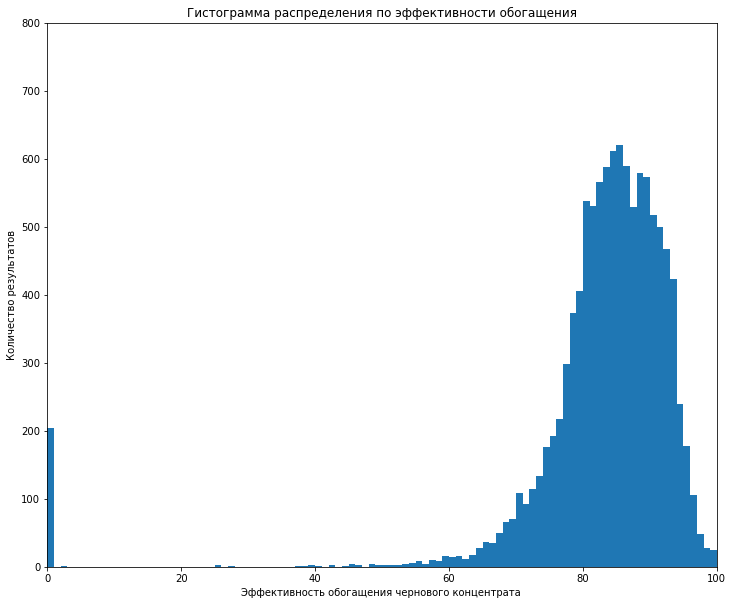

In [14]:
plt.figure(figsize=[12,10])

plt.hist(data_train['rougher.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 800])

plt.xlabel("Эффективность обогащения чернового концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Как видно по гистограмме имеются 0.

In [15]:
data_train[data_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
50,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
51,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
759,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


In [16]:
data_train[data_train['rougher.output.concentrate_au'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
45,2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,...,14.025588,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228
46,2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,...,14.094808,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683
50,2016-01-17 03:00:00,5.759800,9.537415,3.997737,45.267942,68.638723,10.623064,1.217058,16.072705,2.471388,...,14.164342,-552.959690,11.917980,-549.417320,10.016315,-497.644975,7.999080,-500.112143,12.043030,-599.630112
51,2016-01-17 04:00:00,5.807253,10.439505,6.512951,43.237493,72.136712,10.518407,1.336890,17.750367,2.323883,...,14.097072,-549.292129,12.000525,-550.306171,9.925991,-501.985618,7.948277,-500.060988,12.005620,-601.746110
759,2016-02-18 20:00:00,8.478624,11.303437,10.547473,35.776254,80.041038,12.958362,2.369492,9.839622,3.066451,...,23.709602,-412.029336,22.639733,-412.896304,25.021629,-428.537556,21.011542,-400.287375,30.004867,-396.683519


Удалим эти значения.

In [17]:
data_train = data_train.drop(data_train[data_train['rougher.output.recovery'] == 0].index)
data_train[data_train['rougher.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


Гистограмма финального обогащения.

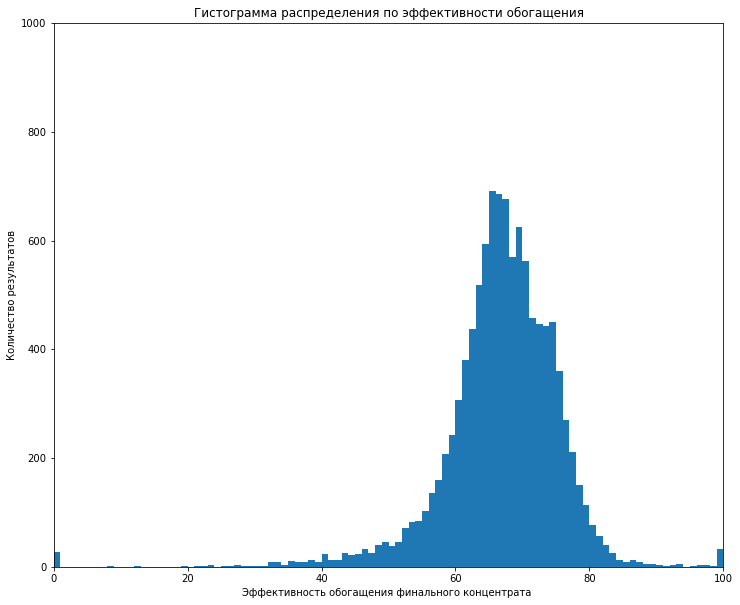

In [18]:
plt.figure(figsize=[12,10])

plt.hist(data_train['final.output.recovery'], bins=100)

plt.xlim([0, 100])
plt.ylim([0, 1000])

plt.xlabel("Эффективность обогащения финального концентрата ")
plt.ylabel("Количество результатов")

plt.title("Гистограмма распределения по эффективности обогащения")
plt.show()

Также удалим 0.

In [19]:
data_train[data_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
644,2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,...,21.991762,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808
1193,2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,...,11.979352,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521
1194,2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,...,12.034636,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068
1195,2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,...,12.016716,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011
1196,2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,...,11.993898,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405


In [20]:
data_train = data_train.drop(data_train[data_train['final.output.recovery'] == 0].index)
data_train[data_train['final.output.recovery'] < 1].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


In [21]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10784 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                10784 non-null  object 
 1   final.output.concentrate_ag                         10784 non-null  float64
 2   final.output.concentrate_pb                         10784 non-null  float64
 3   final.output.concentrate_sol                        10784 non-null  float64
 4   final.output.concentrate_au                         10784 non-null  float64
 5   final.output.recovery                               10784 non-null  float64
 6   final.output.tail_ag                                10784 non-null  float64
 7   final.output.tail_pb                                10784 non-null  float64
 8   final.output.tail_sol                               10784 non-null  float64


## Концентрация веществ

Проверка концентрации золота на различных этапах.

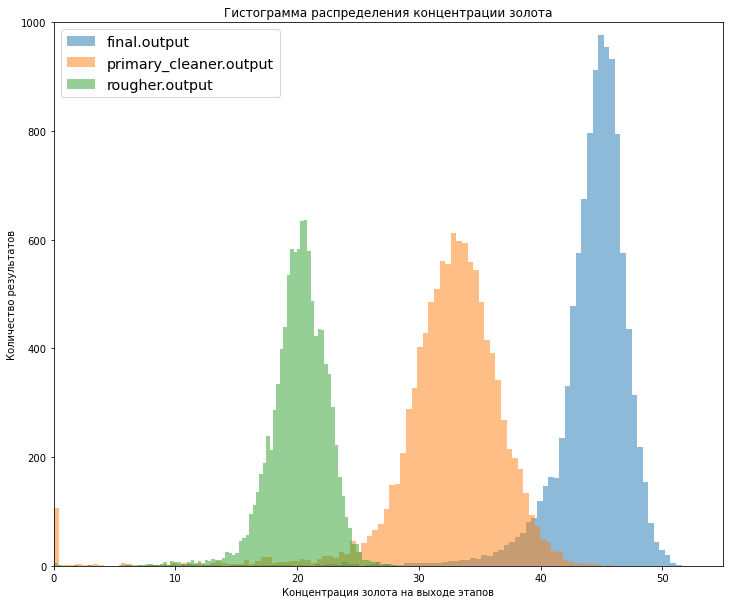

In [22]:
plt.figure(figsize=[12,10])

plt.hist(data_train['final.output.concentrate_au'], bins=100, label = 'final.output', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_au'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_au'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 55])
plt.ylim([0, 1000])

plt.xlabel("Концентрация золота на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации золота")
plt.show()

Как видно концентрация золота растет от одного этапа к другому.

Проверка концентрации серебра на различных этапах.

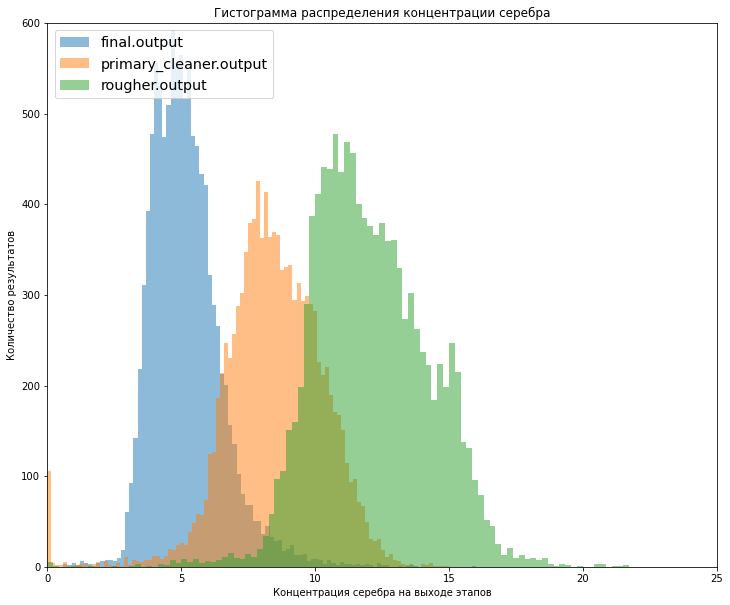

In [23]:

plt.figure(figsize=[12,10])

plt.hist(data_train['final.output.concentrate_ag'], bins=100, label = 'final.output', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_ag'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_ag'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 25])
plt.ylim([0, 600])

plt.xlabel("Концентрация серебра на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации серебра")
plt.show()

Как видно концентрация серебра падает от одного этапа к другому.

Проверка концентрации свинца на различных этапах.

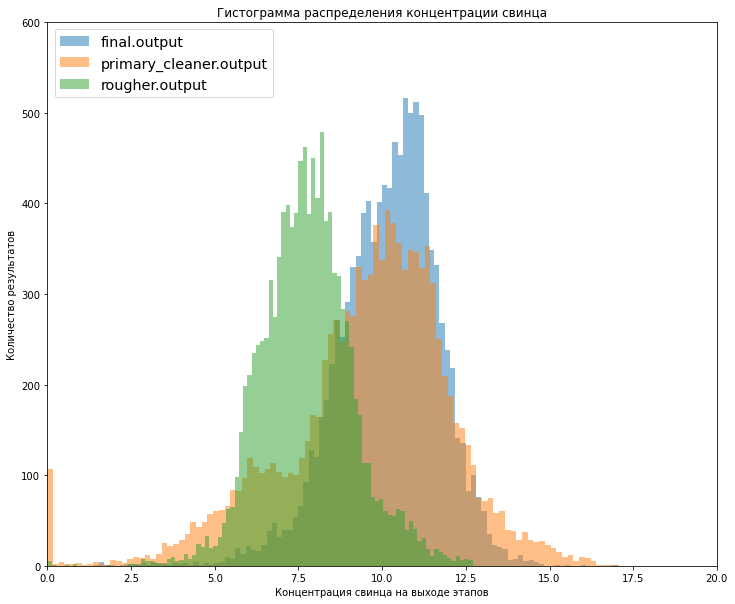

In [24]:
plt.figure(figsize=[12,10])

plt.hist(data_train['final.output.concentrate_pb'], bins=100, label = 'final.output', alpha=.5)
plt.hist(data_train['primary_cleaner.output.concentrate_pb'], bins=100, label = 'primary_cleaner.output', alpha=.5)
plt.hist(data_train['rougher.output.concentrate_pb'], bins=100, label = 'rougher.output', alpha=.5)

plt.xlim([0, 20])
plt.ylim([0, 600])

plt.xlabel("Концентрация свинца на выходе этапов")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентрации свинца")
plt.show()

Концентрация свинца повышается с этапа rougher до primary_cleaner затем усредняется.

## Размеры гранул сырья

Проверка размеров гранул сырья на различных этапах.

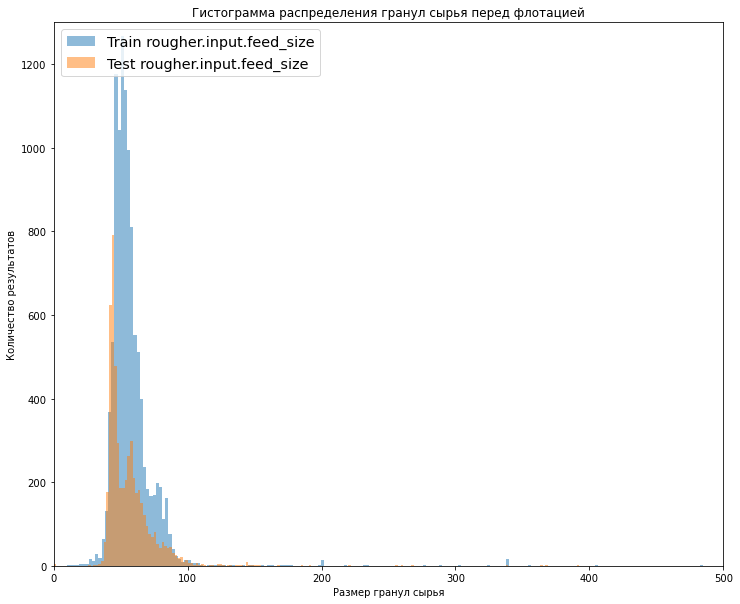

In [25]:
plt.figure(figsize=[12,10])

plt.hist(data_train['rougher.input.feed_size'], bins=200, label = 'Train rougher.input.feed_size', alpha=.5)
plt.hist(data_test['rougher.input.feed_size'], bins=200, label = 'Test rougher.input.feed_size', alpha=.5)

plt.xlim([0, 500])
plt.ylim([0, 1300])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед флотацией")
plt.show()

Распределение гранул перед флотацией имеет вид нормальноо со смещением влево как в обучающей, так и в тестовой выборке. Также присутсвуют выбросы после размера гранул 100. 

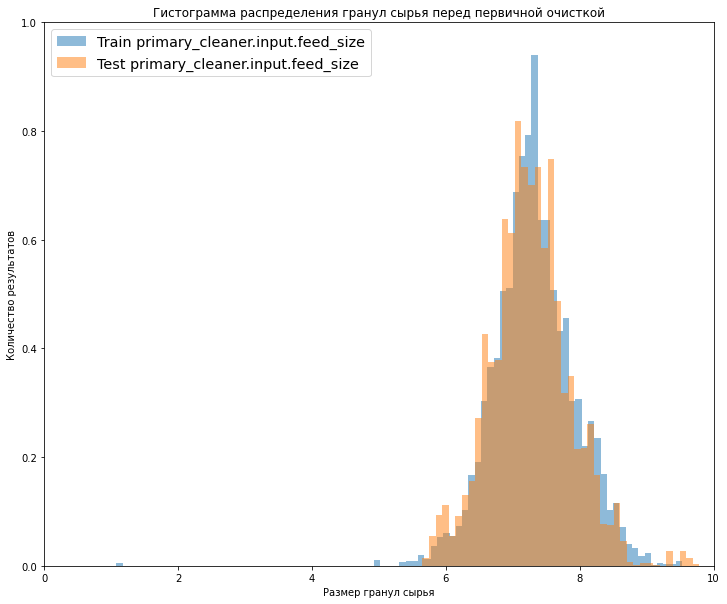

In [21]:
plt.figure(figsize=[12,10])

plt.hist(data_train['primary_cleaner.input.feed_size'], bins=100,density=True, label = 'Train primary_cleaner.input.feed_size', alpha=.5)
plt.hist(data_test['primary_cleaner.input.feed_size'], bins=100,density=True, label = 'Test primary_cleaner.input.feed_size', alpha=.5)

plt.xlim([0, 10])
plt.ylim([0, 1])

plt.xlabel("Размер гранул сырья")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения гранул сырья перед первичной очисткой")
plt.show()

Гистограмма распределения гранул сырья перед первичной очисткой имеет вид нормального распределения.

Подготовка данных с финальными концентрациями в обучающей выборке.

In [23]:
final_train = (data_train['final.output.concentrate_au'] + 
            data_train['final.output.concentrate_ag'] + 
            data_train['final.output.concentrate_pb'] +
            data_train['final.output.concentrate_sol'])
primary_train = (data_train['primary_cleaner.output.concentrate_au'] + 
                data_train['primary_cleaner.output.concentrate_ag'] + 
                data_train['primary_cleaner.output.concentrate_pb'] +
                data_train['primary_cleaner.output.concentrate_sol'])
rougher_train = (data_train['rougher.output.concentrate_au'] + 
                data_train['rougher.output.concentrate_ag'] + 
                data_train['rougher.output.concentrate_pb'] +
                data_train['rougher.output.concentrate_sol'])

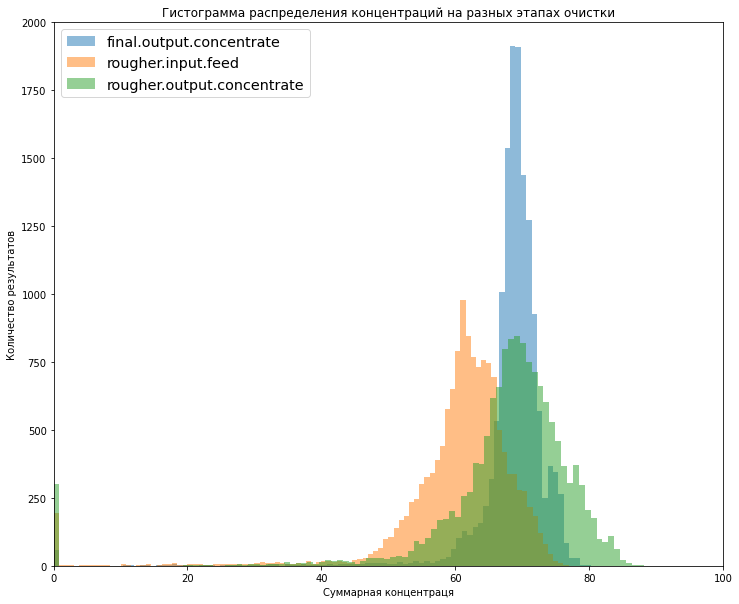

In [25]:
plt.figure(figsize=[12,10])

plt.hist(final_train, bins=100, label = 'final.output.concentrate', alpha=.5)
plt.hist(primary_train, bins=100, label = 'rougher.input.feed', alpha=.5)
plt.hist(rougher_train, bins=100, label = 'rougher.output.concentrate', alpha=.5)

plt.xlim([0, 100])
plt.ylim([0, 2000])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Как видно много аномальных значений в нуле гистограммы.

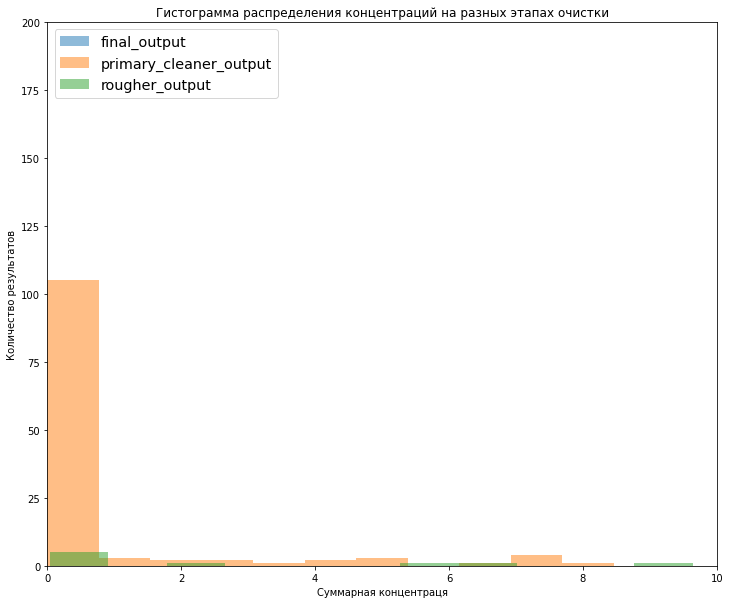

In [29]:
plt.figure(figsize=[12,10])

plt.hist(final_train, bins=100, label = 'final_output', alpha=.5)
plt.hist(primary_train, bins=100, label = 'primary_cleaner_output', alpha=.5)
plt.hist(rougher_train, bins=100, label = 'rougher_output', alpha=.5)

plt.xlim([0, 10])
plt.ylim([0, 200])

plt.xlabel("Суммарная концентраця")
plt.ylabel("Количество результатов")

plt.legend(loc='upper left', fontsize='x-large')

plt.title("Гистограмма распределения концентраций на разных этапах очистки")
plt.show()

Удаление строк в primary_cleaner.output равных нулю.

In [30]:
data_train = data_train.drop(data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].index)
data_train[data_train['primary_cleaner.output.concentrate_au'] == 0].head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level


## Вывод

В ходе проведения анализа данных были выявлено следующее:


Рассчитанная MAE между значением признака rougher.output.recovery и нашими расчетами в тренировочной выборке имеет очень маленькое значение, следовательно эффективность обогащения рассчитана правильно.


В тестовой выборке отсуствуют столбцы типов final.output, primary_cleaner.output, rougher.calculation, rougher.output, secondary_cleaner.output это онлайн метрики, данные по которым будут получены по результатам технологического процесса.  Остальные столбцы исторически известны - это оффлайн метрики.

Были подготовлены  данные для создания модели.

Определена концентрация веществ на разных этапах: концентрация золота растет от одного этапа к другому; концентрация серебра падает одного этапа к другому; концентрация свинца повышается с этапа rougher до primary_cleaner затем усредняется.

Были построены графики размеров гранул сырья на различных этапах.

# Модель

Создание разделение признаков для предсказания rougher.output.recovery и final.output.recovery.

In [31]:
# Подготовка признаков final.output.recovery
columns_to_delete = set(data_train.columns) - final_features_columns
print(columns_to_delete)
train_features_final = data_train.drop(columns_to_delete, axis=1)
print()
print(train_features_final.columns)
# Проверка вхождения столбцов из feateures в столбцы тестовой выборки
print(set(train_features_final.columns) - set(data_test.columns))

# Подготовка признаков для rougher.output.recovery
columns_to_delete = set(train_features_final.columns) - rougher_features_columns
print(columns_to_delete)
train_features_rougher = train_features_final.drop(columns_to_delete, axis=1)
print()
print(train_features_rougher.columns)

{'rougher.calculation.au_pb_ratio', 'final.output.concentrate_ag', 'date', 'rougher.output.concentrate_pb', 'secondary_cleaner.output.tail_ag', 'rougher.output.recovery', 'secondary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_au', 'primary_cleaner.output.tail_sol', 'rougher.output.tail_sol', 'final.output.tail_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'primary_cleaner.output.tail_ag', 'rougher.output.tail_au', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_au', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_sol', 'final.output.tail_ag', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_pb', 'final.output.recovery', 'final.output.concentrate_pb', 'rougher.output.concentrate_ag', 'fin

Подготовим целевой признак.

In [32]:
train_target_final = data_train['final.output.recovery']
train_target_rougher = data_train['rougher.output.recovery']

Подготовим признаки тестовой выборки.

In [33]:
test_features = data_test.drop('date', axis=1)
test_features.columns

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

In [34]:
test_features_final = test_features
columns_to_delete = set(test_features_final.columns) - rougher_features_columns
print(columns_to_delete)
test_features_rougher = test_features_final.drop(columns_to_delete, axis=1)

{'secondary_cleaner.state.floatbank3_a_air', 'primary_cleaner.state.floatbank8_d_level', 'primary_cleaner.state.floatbank8_b_air', 'secondary_cleaner.state.floatbank6_a_air', 'secondary_cleaner.state.floatbank4_b_air', 'secondary_cleaner.state.floatbank4_b_level', 'primary_cleaner.input.xanthate', 'secondary_cleaner.state.floatbank3_b_level', 'primary_cleaner.input.depressant', 'primary_cleaner.state.floatbank8_c_level', 'secondary_cleaner.state.floatbank4_a_air', 'secondary_cleaner.state.floatbank6_a_level', 'primary_cleaner.state.floatbank8_a_air', 'primary_cleaner.state.floatbank8_a_level', 'secondary_cleaner.state.floatbank3_a_level', 'primary_cleaner.input.sulfate', 'secondary_cleaner.state.floatbank2_b_air', 'primary_cleaner.state.floatbank8_b_level', 'secondary_cleaner.state.floatbank4_a_level', 'primary_cleaner.input.feed_size', 'secondary_cleaner.state.floatbank2_a_air', 'secondary_cleaner.state.floatbank3_b_air', 'secondary_cleaner.state.floatbank2_a_level', 'secondary_cleane

Создание функции для вычисления симметричного среднего абсолютного процентного отклонения.

In [35]:
def sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted):
    n = rougher_recovery_real.shape[0]
    rougher_sMAPE = ((2*abs(rougher_recovery_real - rougher_recovery_predicted)/
                     (abs(rougher_recovery_real) + abs(rougher_recovery_predicted))).sum() * 100 / n)
    final_sMAPE = ((2*abs(final_recovery_real - final_recovery_predicted)/
                     (abs(final_recovery_real) + abs(final_recovery_predicted))).sum() * 100 / n)
    return rougher_sMAPE * 0.25 + final_sMAPE * 0.75

Т.к. перед нами стоит задачи регресси, выберем следующие модели для обучения:

- Линейная регрессия
- Полиноминальная регрессия
- Регрессия Ridge
- DecisionTreeRegressor

Выполним поиск лучшей модели для предсказаний.

Линейная регрессия.

In [36]:
%%time

regressor = LinearRegression()
print('Mean R2 from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(regressor, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.1945534942868776
Mean MAE from CV of LinearRegression = -5.903842205297184
Wall time: 302 ms


In [37]:
%%time

regressor = LinearRegression()
scaller = StandardScaler()
pipeline = Pipeline([("standard_scaller", scaller),("linear_regression", regressor)])
print('Mean R2 from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of LinearRegression =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of LinearRegression = -0.19455349428688773
Mean MAE from CV of LinearRegression = -5.903842205297211
Wall time: 486 ms


Полиноминальная регрессия

In [38]:
%%time

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
pipeline = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
print('Mean R2 from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5).mean())
print('Mean MAE from CV of PolynomialRegression with 2 degree =', cross_val_score(pipeline, train_features_final, train_target_final, cv=5, scoring='neg_mean_absolute_error').mean())

Mean R2 from CV of PolynomialRegression with 2 degree = -53.89653174766602
Mean MAE from CV of PolynomialRegression with 2 degree = -31.7011974580862
Wall time: 30.9 s


Регрессия Ridge

In [39]:
%%time

regressor = Ridge()
hyperparams = [{'alpha':[0.1, 1, 10, 100], 'solver':['auto']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['svd']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['cholesky']},
                 {'alpha':[0.1, 1, 10, 100], 'solver':['lsqr']}, 
                 {'alpha':[0.1, 1, 10, 100], 'solver':['sparse_cg']}]

scores = ['r2', 'neg_mean_absolute_error']

for score in scores:
    print('# Tuning hyper-parameters for %s' % score)
    print()
    clf = GridSearchCV(regressor, hyperparams, scoring=score)
    clf.fit(train_features_final, train_target_final)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
    print()

# Tuning hyper-parameters for r2

Best parameters set found on development set:

{'alpha': 100, 'solver': 'svd'}

Grid scores on development set:

-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'auto'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'auto'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'auto'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'auto'}
-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'svd'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'svd'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'svd'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'svd'}
-0.195 (+/-0.649) for {'alpha': 0.1, 'solver': 'cholesky'}
-0.194 (+/-0.649) for {'alpha': 1, 'solver': 'cholesky'}
-0.194 (+/-0.647) for {'alpha': 10, 'solver': 'cholesky'}
-0.187 (+/-0.628) for {'alpha': 100, 'solver': 'cholesky'}
-0.225 (+/-0.386) for {'alpha': 0.1, 'solver': 'lsqr'}
-0.225 (+/-0.386) for {'alpha': 1, 'solver': 'lsqr'}
-0.225 (+/-0.386) for {'alpha': 10, 'solver': 'lsqr'}
-0.225 (+/-0.385) for {'alph

DecisionTreeRegressor

In [40]:
%%time

regressor = DecisionTreeRegressor() 
max_depth_list = [x for x in range(2, 21, 2)]
hyperparams = [{'criterion':['mse'], 'max_depth':max_depth_list, 'random_state':[12345]},
               {'criterion':['mae'], 'max_depth':max_depth_list, 'random_state':[12345]}]

print('# Tuning hyper-parameters')
print()
clf = GridSearchCV(regressor, hyperparams)
clf.fit(train_features_final, train_target_final)
print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"% (mean, std * 2, params))
print()

# Tuning hyper-parameters

Best parameters set found on development set:

{'criterion': 'mae', 'max_depth': 2, 'random_state': 12345}

Grid scores on development set:

-0.235 (+/-0.384) for {'criterion': 'mse', 'max_depth': 2, 'random_state': 12345}
-0.305 (+/-0.563) for {'criterion': 'mse', 'max_depth': 4, 'random_state': 12345}
-0.400 (+/-0.614) for {'criterion': 'mse', 'max_depth': 6, 'random_state': 12345}
-0.668 (+/-1.238) for {'criterion': 'mse', 'max_depth': 8, 'random_state': 12345}
-1.149 (+/-1.432) for {'criterion': 'mse', 'max_depth': 10, 'random_state': 12345}
-1.548 (+/-1.671) for {'criterion': 'mse', 'max_depth': 12, 'random_state': 12345}
-1.338 (+/-1.525) for {'criterion': 'mse', 'max_depth': 14, 'random_state': 12345}
-1.398 (+/-1.065) for {'criterion': 'mse', 'max_depth': 16, 'random_state': 12345}
-1.589 (+/-1.474) for {'criterion': 'mse', 'max_depth': 18, 'random_state': 12345}
-1.683 (+/-1.586) for {'criterion': 'mse', 'max_depth': 20, 'random_state': 12345}
-0.030

Проверим лучшие модели по метрикам на созданной метрике sMAPE.

In [41]:
rougher_recovery_real = data_full.loc[test_features_rougher.index,'rougher.output.recovery']
final_recovery_real = data_full.loc[test_features_final.index,'final.output.recovery']

In [42]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))  

sMAPE для линейной регресии 12.623643558079012
sMAPE для полиноминальной регресии 25.956157548294684
sMAPE для регресии Ridge 12.493247422675706
sMAPE для DecisionTreeRegressor 12.94752083927472
Wall time: 38.5 s


Создание константной модели на медианных значений.

In [43]:
median_rougher_recovery = data_full['rougher.output.recovery'].median()
median_final_recovery = data_full['final.output.recovery'].median()

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для медианной константной модели 11.679754848001743


Произведем сокращение тестовой выборки из-за пропущенных значений rougher.output.recovery и final.output.recovery в полном датафрейме. Для вычисления sMAPE длина и индексы всех серий должны быть одинаковы.

In [44]:
rougher_recovery_real.dropna(inplace=True)
print('Количество строк rougher_recovery_real =', rougher_recovery_real.shape[0])
final_recovery_real.dropna(inplace=True)
print('Количество строк final_recovery_real =', final_recovery_real.shape[0])
print('Количество строк test_features_rougher =', test_features_rougher.shape[0])

not_nan_index = set(test_features_rougher.index)
not_nan_index = not_nan_index.intersection(set(final_recovery_real.index), set(rougher_recovery_real.index))
print('Количество индексов с полными данными=', len(not_nan_index))

Количество строк rougher_recovery_real = 5229
Количество строк final_recovery_real = 5229
Количество строк test_features_rougher = 5229
Количество индексов с полными данными= 5229


Преобразуем количество данных тестовой выбоки и рельных так, чтобы в итоге не было NaN.

In [45]:
rougher_recovery_real = data_full.loc[not_nan_index,'rougher.output.recovery']
final_recovery_real = data_full.loc[not_nan_index,'final.output.recovery']
test_features_rougher = test_features_rougher.loc[not_nan_index,:]
test_features_final = test_features_final.loc[not_nan_index,:]
print('Количество строк test_features_final =', test_features_final.shape[0])

Количество строк test_features_final = 5229


Повторим получение sMAPE на тех же моделях.

In [46]:
%%time

model = LinearRegression()
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для линейной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

regressor = LinearRegression()
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
model = Pipeline([("polynomial_features", polynomial_features),("linear_regression", regressor)])
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для полиноминальной регресии',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для регресии Ridge',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted))

model = DecisionTreeRegressor(criterion='mae', max_depth=2, random_state=12345)
model.fit(train_features_rougher, train_target_rougher)
rougher_recovery_predicted = model.predict(test_features_rougher)
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('sMAPE для DecisionTreeRegressor',sMAPE_score(rougher_recovery_real, rougher_recovery_predicted, final_recovery_real, final_recovery_predicted)) 

n = rougher_recovery_real.shape[0]
rougher_sMAPE = ((2*abs(rougher_recovery_real - median_rougher_recovery)/
                     (abs(rougher_recovery_real) + abs(median_rougher_recovery))).sum() * 100 / n)
final_sMAPE = ((2*abs(final_recovery_real - median_final_recovery)/
                     (abs(final_recovery_real) + abs(median_final_recovery))).sum() * 100 / n)
print('sMAPE для медианной константной модели', rougher_sMAPE * 0.25 + final_sMAPE * 0.75)

sMAPE для линейной регресии 12.623643558079012
sMAPE для полиноминальной регресии 25.956157548294684
sMAPE для регресии Ridge 12.493247422675706
sMAPE для DecisionTreeRegressor 12.94752083927472
sMAPE для медианной константной модели 11.679754848001743
Wall time: 38.1 s


Сравним модель Ridge c медианной константной по метрикам MAE и R2. Проверим показания на final_recovery_real.

In [47]:
model = Ridge(alpha=100, solver='sparse_cg')
model.fit(train_features_final, train_target_final)
final_recovery_predicted = model.predict(test_features_final)
print('R2 Ridge model =', r2_score(final_recovery_real, final_recovery_predicted))
print('MAE Ridge model =', mean_absolute_error(final_recovery_real, final_recovery_predicted))
print()

final_median_predict = pd.Series(median_final_recovery, index=not_nan_index)
print('R2 constant model =', r2_score(final_recovery_real, final_median_predict))
print('MAE constant model =', mean_absolute_error(final_recovery_real, final_median_predict))

R2 Ridge model = -0.3226807267156595
MAE Ridge model = 7.511087480293804

R2 constant model = -0.15530194696012067
MAE constant model = 6.706628293443592


## Вывод 

В ходе создания модели, была написана функция для вычисления sMAPE. Каждая модель была изучена на качество с помощью методов кросс-валидации и поиска гипер параметром GridSearchCV.

Лучшая модель была определена - Ridge, т.к. имеет самое низкое значение sMAPE.

После того как были удалены значения NaN модель изменила значения. 

# Итоговый вывод

В ходе данной работы было выполнено следующее:
- Были подготовлены данные.
- Произведен исследовательский налаиз данных.
- Была построена и обучена модель.
- ЛУчше всех себя показал Регрессор Ridge 
